
#Assignment No 2a
######*Sibt ul Hussain*
----
##Goal

Your goal in this assigment is to implement a Gaussian Bayes Classifier.

There are three different flavours of Bayes Rule

- Binomial Bayes (We saw last time, in case of spam classification)
- Multinomial Bayes
- **Gaussian Bayes**


In [11]:
%pylab inline
import scipy.stats
from collections import defaultdict
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload 
%autoreload 2
import pandas as pd
import numpy as np
#import seaborn as sns

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [96]:
## Your code goes here...
# You might need to define auxliary classes for composition.. ?

# **Hint: You can use scipy.stats.multivariate_normal class to build the multi-variage Gaussian
# and then use its pdf member function to calculate the pdf of a given n-dimensional instance**
#data=pd.read_csv('./iris.txt')
#data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
class GaussianBayes:
    ''' Implements the Gaussian Bayes For Classification... '''
    def __init__(self):
        pass
    def multigause(self,Vect,Mean,Cov):
        inv=np.linalg.inv(Cov)
        val1=0.5*(np.dot(np.dot((Vect-Mean).T,inv),(Vect-Mean)))
        val2=-2*np.log(2*math.pi)
        val3=0.5*np.log(np.linalg.det(Cov))
        fval=val2-val3-val1
        return fval
    def train(self, X, Y):
        ''' Train the multiclass (or Binary) Bayes Rule using the given 
            X [m x d] data matrix and Y labels matrix
            
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional examples.
            Y: [m x 1] a label vector.
            
            Returns:
            -----------
            Nothing
            '''
        
        print (X.shape)
        X=X.T
        print (X.shape)
        A=(Y=='Iris-setosa')
        s=X[:,A]
        C1=np.array(s)
        C1=C1.T
        A=(Y=='Iris-versicolor')
        s=X[:,A]
        C2=np.array(s)
        C2=C2.T
        A=(Y=='Iris-virginica')
        s=X[:,A]
        C3=np.array(s)
        C3=C3.T
        ## now go and train a model for each class...
        self.X1=np.cov(C1.T)
        self.X2=np.cov(C2.T)
        self.X3=np.cov(C3.T)
        #self.mean;
        self.meanC1=np.mean(C1,axis=0)
        self.meanC2=np.mean(C2,axis=0)
        self.meanC3=np.mean(C3,axis=0)
        self.totalcount=len(Y);
        a=(Y=='Iris-setosa')
        b=Y[a]
        count=len(b)
        self.probc1=np.log(count/self.totalcount)
        a=(Y=='Iris-versicolor')
        b=Y[a]
        count=len(b)
        self.probc2=np.log(count/self.totalcount)
        a=(Y=='Iris-virginica')
        b=Y[a]
        count=len(b)
        self.probc3=np.log(count/self.totalcount)
    def test(self, X):
        i=0;
        X=X.T
        self.predict=np.empty((X.shape[1],3))
        returnval=np.empty((X.shape[1],1))
        returnval1=[]
        while i<X.shape[1]:
            list1=X[: ,i]
            listarr=np.array(list1)
            val1=self.multigause(listarr,self.meanC1,self.X1)
            val2=self.multigause(listarr,self.meanC2,self.X2)
            val3=self.multigause(listarr,self.meanC3,self.X3)
            self.predict[i][0]=val1+self.probc1
            self.predict[i][1]=val2+self.probc2
            self.predict[i][2]=val3+self.probc3
            if self.predict[i][0]>self.predict[i][1] and self.predict[i][0]>self.predict[i][2]:
                returnval[i]=self.predict[i][0]
                returnval1.append('Iris-setosa')
            if self.predict[i][1]>self.predict[i][0] and self.predict[i][1]>self.predict[i][2]:
                returnval[i][0]=self.predict[i][1]
                returnval1.append('Iris-versicolor')
            if self.predict[i][2]>self.predict[i][0] and self.predict[i][2]>self.predict[i][1]:
                returnval[i][0]=self.predict[i][2]
                returnval1.append('Iris-virginica')
            i+=1
        retut=np.array(returnval1)    
        return retut,returnval 
        ''' Test the trained classifiers on the given set of examples 
                   
            Input:
            ------
            X: [m x d] a data matrix of m d-dimensional test examples.
           
            Returns:
            -----------
                pclass: the predicted class for each example, i.e. to which it belongs
                probability: probability of each example falling in to the predicted class...
        '''
        
        # nexamples, nfeatures=X.shape
        #pclasses=[0]*nexamples
        
        # your code go here...
    
    def predict(self, X):
        listarr=np.array(X)
        cls=' ';
        val1=self.multigause(listarr,self.meanC1,self.X1)
        val2=self.multigause(listarr,self.meanC2,self.X2)
        val3=self.multigause(listarr,self.meanC3,self.X3)
        val1=val1+self.probc1
        val2=val2+self.probc2
        val3=val3+self.probc3
        if val1>val2 and val1>val3:
            cls='Iris-Setosa'
        if val2>val1 and val2>val3:
            cls='Iris-Versicolor'
        if val3>val1 and val3>val2:
            cls='Iris-Virginica'
        """
        Test the trained classifiers on the given example X
        
                   
            Input:
            ------
            X: [1 x d] a d-dimensional test example.
           
            Returns:
            -----------
                pclass: the predicted class for the given example, i.e. to which it belongs
        """
        return cls            


In [10]:
import pandas as pd
import numpy as np

In [21]:
#many important functions are already written and provided in tools.py 
# please have a look at these functions....
import tools as t


In [114]:
data=pd.read_csv('./iris.txt',header=-1)
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
#print (data.describe())
X=np.array([data['SepalLength'],data['SepalWidth'],data['PetalLength'],data['PetalWidth']])
Y=np.array(data['Class'])
list1=[ 5.1 , 3.5 , 1.4 , 0.2]
#Z=np.array()
obj=GaussianBayes()
obj.train(X.T,Y)
a=obj.predict(list1)
print (a)

(150, 4)
(4, 150)
Iris-Setosa


####Lets Visualize the data

In [36]:
sns.pairplot(data, hue="Class")

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


#### Get your data in matrix

In [7]:

X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print (" Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape)

 Data Set Dimensions= (150, 4)  True Class labels dimensions (150,)


####Let's Plot the Data

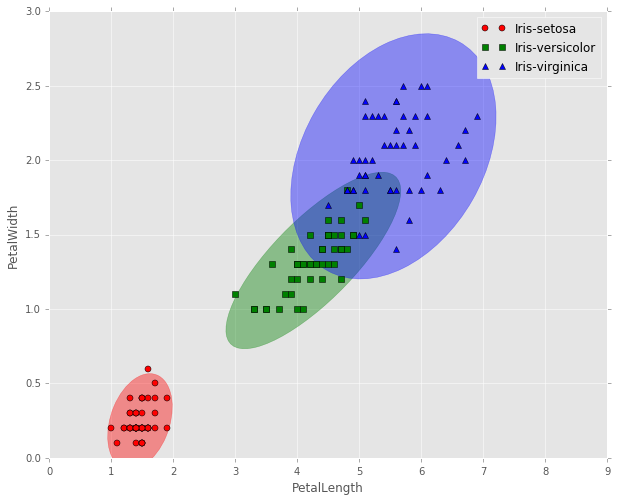

In [22]:
#Lets plot the Complete data, with its covariance matrix...
# Remember seeing is believing
featnames=data.columns
t.plotCov(X[:,2:],Y,labels=featnames.values[2:4])

### Splitting the Data into Training and Testing Sets
There must be a validation set but for this case we are using only two sets, training and validation sets...

In [23]:
# Split your data into training and test-set... 
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y)

print (" Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape)   
print (" Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytrain.shape)   

 Training Data Set Dimensions= (105, 4) Training True Class labels dimensions (105,)
 Test Data Set Dimensions= (45, 4) Test True Class labels dimensions (105,)


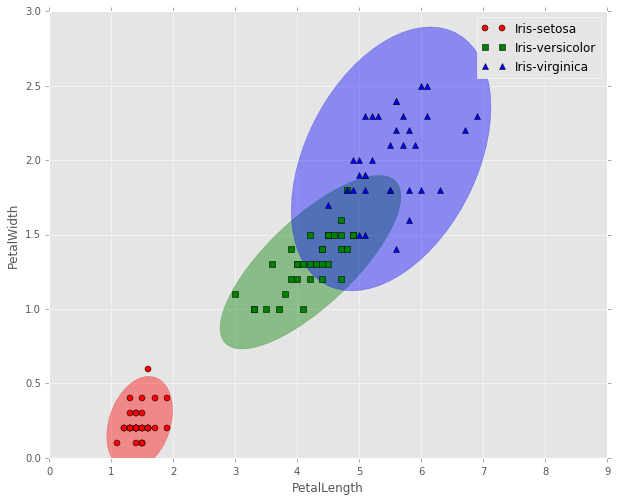

In [39]:
#Lets plot the training data...
t.plotCov(Xtrain[:,2:],Ytrain, labels=featnames.values[2:4])
# so we will be estimating these covariance matrices and means...

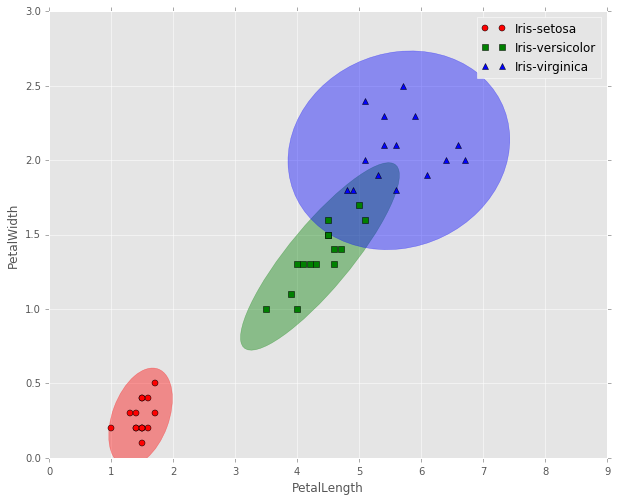

In [25]:
#Lets plot the test data...
t.plotCov(Xtest[:,2:],Ytest,labels=featnames.values[2:4])

Training Time
========
Let's train a Gaussian Bayes, first using two attributes.
- What Two Attributes to use ? Any Guess...

In [98]:
# Lets train a Gaussian Bayes Classifier on Petal Length and Width
gb=GaussianBayes()
gb.train(Xtrain[:,2:],Ytrain)

(105, 2)
(2, 105)


In [99]:
#Lets test it on the set of unseen examples...
pclasses,res=gb.test(Xtest[:,2:])
print (pclasses)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


Lets see how good we are doing...
==================

In [100]:
#Lets see how good we are doing...
print (pclasses==Ytest)
print (Ytest.shape[0])

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
45
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virg

In [101]:
# Using Just two attributes, accuracy is 
print (np.sum(pclasses==Ytest))
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))


44
Accuracy =  0.977777777778


In [103]:
print (" Plotting the Decision Surface of Training Set... ")
t.plot_decision_regions(Xtrain[:,2:],Ytrain,clf=gb, res=0.02, cycle_marker=True, legend=1)

 Plotting the Decision Surface of Training Set... 


TypeError: 'numpy.ndarray' object is not callable

##Question: What can you conclude from the above decision Region





#K-Fold Cross Validation

Since our dataset is not too big, to ensure that we are reporting true picture of our classifier, 
we will have to cross validate and report the mean accuracy across the folds to reflect the true 
picture of our classifier.

In [104]:
# Now lets cross validate, and test the result...
nfolds=4
folds=t.generate_folds(X,Y,nfolds)

#now lets train and test on these folds...
totacc=[]
for k in range(nfolds):
    gb=GaussianBayes()
    gb.train(folds[k][0][:,2:],folds[k][1])
    pclasses,res=gb.test(folds[k][2][:,2:])
    acc=np.sum(pclasses==folds[k][3])/float(folds[k][3].shape[0])
    print ("[Info] Fold {} Accuracy = {}".format(k+1, acc))
    totacc.append(acc)

print (totacc, 'Mean Accuracy =', np.mean(totacc))

Generating CV data for 3 classes


C:\Users\zainali\Downloads\A-2\tools.py:471: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 150
  Xt = X[idx, :]  # get training examples


IndexError: index 4 is out of bounds for axis 0 with size 4


Hmm Quite Impressive...
--------------------------------

In [105]:
# Lets go and use all the four attributes...
gb.train(Xtrain,Ytrain)

(105, 4)
(4, 105)


In [108]:
pclasses,res=gb.test(Xtest)
print (pclasses)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica']


####Do you expect your Test accuracy to increase or decrease ?

In [109]:
# Using all four attributes, accuracy is 
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

Accuracy =  0.955555555556


What can you conclude ?
====================

## Let's change the features... 

In [110]:
features=[0, 1]
gb.train(Xtrain[:,features],Ytrain)
pclasses,res=gb.test(Xtest[:,features])
print ("Accuracy = ", np.sum(pclasses==Ytest)/float(Ytest.shape[0]))

(105, 2)
(2, 105)
Accuracy =  0.777777777778


Remember Features are the important !!
======================

[2 2 2 ..., 2 2 2] <type 'numpy.int64'> False


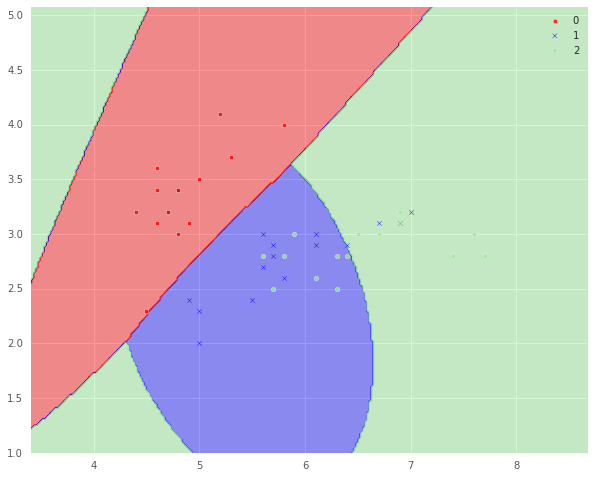

In [41]:
t.plot_decision_regions(Xtest[:,features],Ytest,clf=gb, res=0.02, cycle_marker=True, legend=1)

##Goal: Find the best pair of features (that gives maximum mean cross-validation accuracy) from all the available pairs for the problem in hand